<a href="https://colab.research.google.com/github/UiinKim/UiinKim/blob/main/%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
#데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename='ted_en-20160408.xml')

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x782a9ea5bb20>)

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF-8')
target_text=etree.parse(targetXML) #Xml파일 간단하게 파싱

# xml 파일로부터 <content>와 </content>사이의 내용만 가져온다.
parse_text='\n'.join(target_text.xpath('//content/text()'))

#정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text) #괄호로 구성된 내용을 제거

#입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행
sent_text=sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환
normalized_text=[]
for string in sent_text:
  tokens=re.sub(r"[^a-z0-9]+"," ",string.lower()) #sentence.lower() 상태에서 a-z0-9가 아닌 것들은 모두 ' '으로 바꾼다.
  normalized_text.append(tokens)

result=[word_tokenize(sentence) for sentence in normalized_text]

In [5]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [6]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [7]:
#Word2Vec 학습시키기
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model=Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
#vector_size는 데이터가 적을 땐 크게, 데이터가 많을 땐 작게(150~300)
#window는 훈련시 앞 뒤로 고려하는 단어의 개수
#min_count는 해당 빈도수보다 적게 등장할 경우 모델 학습에서 배제
#worker은 스레드 개수. 스레드가 많아질수록 빌드 속도가 빨라진다.(본인 컴퓨터 스펙에 맞게 쓴다.)
#sg 0=CBOW(중심단어 예측) 1=Skipgram(주변단어 예측)

In [8]:
model_result=model.wv.most_similar('man')
#Word2Vec는 입력한 'man'에 대해서 가장 유사한 단어들을 출력해주는 기능이다.
print(model_result)

[('woman', 0.8442783355712891), ('guy', 0.8264489769935608), ('lady', 0.7758285999298096), ('boy', 0.7586669325828552), ('gentleman', 0.7414661049842834), ('girl', 0.7406434416770935), ('soldier', 0.7135183811187744), ('kid', 0.6860795617103577), ('david', 0.6628976464271545), ('friend', 0.6582366824150085)]


In [9]:
#Word2Vec 모델 저장 및 로드
model.wv.save_word2vec_format('eng_w2v') #모델 저장
loaded_model=KeyedVectors.load_word2vec_format('eng_w2v') #모델 로드

In [10]:
model_result=loaded_model.most_similar('man')
print(model_result)
#똑같이 출력해보기

[('woman', 0.8442783355712891), ('guy', 0.8264489769935608), ('lady', 0.7758285999298096), ('boy', 0.7586669325828552), ('gentleman', 0.7414661049842834), ('girl', 0.7406434416770935), ('soldier', 0.7135183811187744), ('kid', 0.6860795617103577), ('david', 0.6628976464271545), ('friend', 0.6582366824150085)]


In [13]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.5 MB/s eta 0:00:00


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x782a665c2c50>)

In [15]:
train_data=pd.read_table('ratings.txt')

In [17]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [19]:
train_data.isnull().any()

id          False
document     True
label       False
dtype: bool

In [22]:
train_data=train_data.dropna(how='any')
train_data.isnull().any()

id          False
document    False
label       False
dtype: bool

In [26]:
len(train_data['document'])

199992

In [27]:
train_data['document']=train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')

<ipython-input-27-f440df6777e8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document']=train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')


In [28]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [29]:
from tqdm import tqdm

In [31]:
#불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt=Okt()
tokenized_data=[]
for sentence in tqdm(train_data['document']): #tqdm으로 bar로 표현한다.
  token=okt.morphs(sentence, stem=True) #stem=True로 쓰면 어간으로 토큰화된다. 찍어야지->찍다. Flase는 그대로 norm이 나온다.
  stop_removed_sentence=[word for word in token if not word in stopwords]
  tokenized_data.append(stop_removed_sentence)

100%|██████████| 199992/199992 [2:31:53<00:00, 21.95it/s]


리뷰의 최대 길이 :  68
리뷰의 평균 길이 :  10


<function matplotlib.pyplot.show(close=None, block=None)>

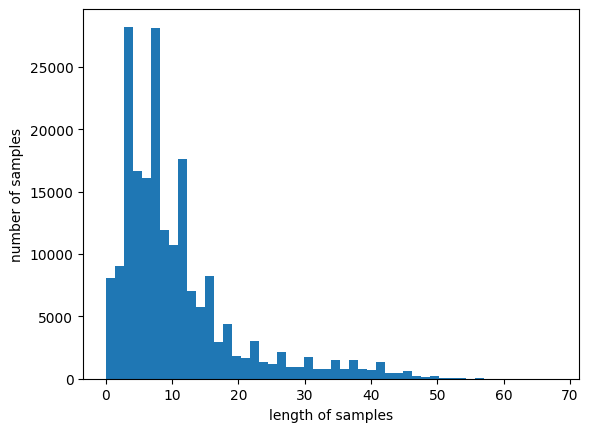

In [34]:
print('리뷰의 최대 길이 : ', max(len(review)for review in tokenized_data))
print('리뷰의 평균 길이 : ', sum(len(review) for review in tokenized_data)//len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show

In [35]:
#Word2Vec 모델 학습
model=Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [36]:
model.wv.vectors.shape

(17947, 100)

In [37]:
print(model.wv.most_similar('최민식'))

[('이정재', 0.8637580275535583), ('한석규', 0.8603535294532776), ('김창완', 0.8510481119155884), ('박중훈', 0.8424002528190613), ('설경구', 0.841122567653656), ('김상중', 0.84110027551651), ('정재영', 0.8400331139564514), ('양동근', 0.8387336730957031), ('김수현', 0.835372269153595), ('안성기', 0.8334715962409973)]


In [38]:
print(model.wv.most_similar('히어로'))

[('느와르', 0.8534291386604309), ('블록버스터', 0.8435752391815186), ('무협', 0.8378782272338867), ('호러', 0.829958975315094), ('홍콩', 0.8142580986022949), ('물', 0.8003020286560059), ('멜로', 0.7942586541175842), ('정통', 0.7932726144790649), ('물의', 0.7899613976478577), ('무비', 0.7807560563087463)]
